# Figure 04
## FOXSI3 Instrumentation Milo's paper
https://v2.overleaf.com/read/wcfwdbgdfgcc
### October 2018
### Milo BC @ UC Berkeley

### Goal:

<div class="alert alert-info">
Another plot show ghost rays as a function of spacing between shells<br/>
<div/>

# Question: What's a good way to show the space between shells dependance of Ghost Rays?

I took the original FOXSI optics dimensions of a 10-Shell module and multiple the input parameters (Inner shell radii) for a factor of 1.0, 1.2, ..., 3.0. 

The result is saved in a set of CVS files containing all rays. This is located at: /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from foxsisim.util import load_rays
from foxsisim.detector import Detector
sns.set_context('poster')

In [14]:
fbr = 3.09671   ## Front blocker
rbr = 2.62      ## Rear blocker
angle = 30.0    ## off-axis angle in arcmin
factor = np.arange(1.,3.2,.2)    ## Scale factor

## Defining lists:
All_Drays, All_Hrays, All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

In [15]:
for f in factor:
    # Loading Rays:
    Frays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_'+str(round(f,2))+'.csv')
    # Fix little bug in rays:
    for ray in Frays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Frays)
                      
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Frays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Frays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Frays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Frays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]
    
    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)

    sim_scale = 1.0    # 1cm = 17.4 arcmin
    
    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)

                      

Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_1.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_1.2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_1.4.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_1.6.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_1.8.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/rays_Factor_=_2.2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_

In [47]:
Doubles, Hyp, Par = [], [], []
for i, f in enumerate(factor):
    Doubles.append(len(All_Drays[i]))
    Hyp.append(len(All_Hrays[i]))
    Par.append(len(All_Prays[i]))

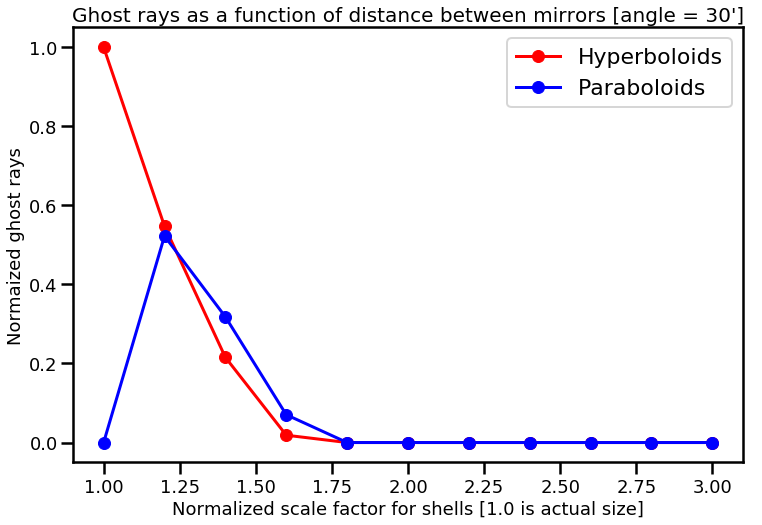

In [72]:
fig = plt.figure(figsize=(12,8))
plt.title("Ghost rays as a function of distance between mirrors [angle = 30']",fontsize=20)
plt.plot(factor,np.array(Hyp)/max(Hyp),'-or',label='Hyperboloids')
plt.plot(factor,np.array(Par)/max(Hyp),'-ob',label='Paraboloids')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Normaized ghost rays',fontsize=18)
plt.xlabel('Normalized scale factor for shells [1.0 is actual size]',fontsize=18)
plt.legend()

## From here we see we need more resolution and also try some smaller than 1 factors.

I will try [0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20, 1.25,1.30, 1.35, 1.40]

In [73]:
factor = np.arange(0.90,1.45,.05) 

## Data for [0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20, 1.25,1.30, 1.35, 1.40] radii located at: 

In [2]:
Dfolder = '/Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays_nested/F309R262/rays/'